In [186]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [187]:
df = pd.concat(
    map(pd.read_csv, ['merged_file_insta1.csv', 'merged_file_final_fb1.csv']), ignore_index=True)
df = df.dropna()
print(df)

      Child Smile Female   Male  PeopleNumber   Text close_up Indoors  \
0      True  True   True  False             1  False    False   False   
1     False  True   True   True             2  False    False   False   
2     False  True   True  False             1  False    False   False   
3      True  True   True  False             1  False    False   False   
4      True  True  False   True             1  False    False   False   
...     ...   ...    ...    ...           ...    ...      ...     ...   
4119      1     1      1      1             2      0        0       0   
4120      0     0      0      0             0      1        0       0   
4121      0     1      1      1             2      0        0       0   
4122      1     1      0      1             2      0        0       0   
4123      0     1      1      1             2      1        0       0   

     Outdoors dominantColor  ...  Total Interactions  Contrast  ANGRY CALM  \
0       False          cyan  ...             

In [188]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    return df

In [189]:
df = change_types(df)

In [190]:
df.dtypes

Child                    int64
Smile                    int64
Female                   int64
Male                     int64
PeopleNumber             int64
Text                     int64
close_up                 int64
Indoors                  int64
Outdoors                 int64
dominantColor           object
LOGO                     int64
Followers at Posting     int64
Total Interactions       int64
Contrast                object
ANGRY                    int64
CALM                     int64
CONFUSED                 int64
DISGUSTED                int64
FEAR                     int64
HAPPY                    int64
SAD                      int64
SURPRISED                int64
dtype: object

In [191]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0
mean,0.4,0.8,0.7,0.4,1.2,0.3,0.0,0.1,0.1,0.6,6343522.6,50491.0,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,10134479.4,307310.0,0.1,0.5,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,87607.8,124.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,866633.0,387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,8106419.2,10786.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,29486754.0,5750308.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


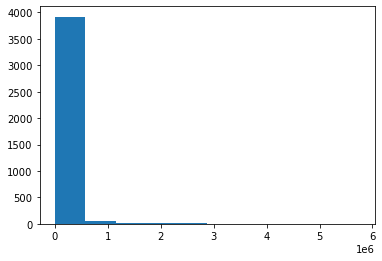

In [192]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [193]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.90)]
# new_df = df[(df['Total Interactions'] < df['Total Interactions'].quantile(0.80)) & (df['Total Interactions'] > df['Total Interactions'].quantile(0.20))]
# plt.hist(new_df['Total Interactions'])

In [194]:
new_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0
mean,0.4,0.8,0.7,0.4,1.2,0.3,0.0,0.1,0.1,0.6,4964171.1,3800.4,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,9188338.0,6522.2,0.1,0.5,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,77250.2,110.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,394945.0,301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1995020.2,4012.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,29486754.0,25440.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [195]:
df[df['Total Interactions']>100000].count()

Child                   153
Smile                   153
Female                  153
Male                    153
PeopleNumber            153
Text                    153
close_up                153
Indoors                 153
Outdoors                153
dominantColor           153
LOGO                    153
Followers at Posting    153
Total Interactions      153
Contrast                153
ANGRY                   153
CALM                    153
CONFUSED                153
DISGUSTED               153
FEAR                    153
HAPPY                   153
SAD                     153
SURPRISED               153
dtype: int64

In [196]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

0       4.593569
1       3.093195
2       3.393552
3       4.390779
4       5.781499
          ...   
4119    1.760828
4120    1.379175
4121    1.055932
4122    0.856490
4123    0.594462
Length: 3618, dtype: float64

C:\Users\User\anaconda3\envs\Diplomatiki\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    3618.000000
mean        2.396957
std         4.386693
min         0.004986
25%         0.407134
50%         1.432157
75%         2.865174
max       139.164638
dtype: float64

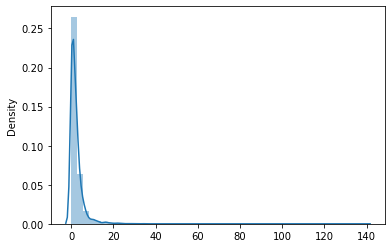

In [197]:
sns.distplot(y)
y.describe()

In [198]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,1,0,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,0,0,0,0,green,1,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,0,0
3,1,1,1,0,1,0,0,0,1,grey,1,HIGH,0,1,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,1,0,0
4120,0,0,0,0,0,1,0,0,0,blue,1,LOW,0,0,0,0,0,0,0,0
4121,0,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,0,0,0
4122,1,1,0,1,2,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,1,0


In [199]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,1,2,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1,1,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
4,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,1,1,1,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4120,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4121,0,1,1,1,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4122,1,1,0,1,2,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [200]:
# y = (y - y.min())/(y.max() - y.min())

In [201]:
def change_types(X):
    X['dominantColor_blue'] =X['dominantColor_blue'].astype('int64')
    X['dominantColor_brown'] =X['dominantColor_brown'].astype('int64')
    X['dominantColor_cyan'] =X['dominantColor_cyan'].astype('int64')
    X['dominantColor_green'] =X['dominantColor_green'].astype('int64')
    X['dominantColor_grey'] =X['dominantColor_grey'].astype('int64')
    X['dominantColor_orange'] =X['dominantColor_orange'].astype('int64')
    X['dominantColor_pink'] =X['dominantColor_pink'].astype('int64')
    X['dominantColor_purple'] =X['dominantColor_purple'].astype('int64')
    X['dominantColor_red'] =X['dominantColor_red'].astype('int64')
    X['dominantColor_white'] =X['dominantColor_white'].astype('int64')
    X['dominantColor_yellow'] =X['dominantColor_yellow'].astype('int64')
    X['Contrast_HIGH'] =X['Contrast_HIGH'].astype('int64')
    X['Contrast_LOW'] =X['Contrast_LOW'].astype('int64')
    return X

In [202]:
X = change_types(X)
X.dtypes

Child                   int64
Smile                   int64
Female                  int64
Male                    int64
PeopleNumber            int64
Text                    int64
close_up                int64
Indoors                 int64
Outdoors                int64
LOGO                    int64
ANGRY                   int64
CALM                    int64
CONFUSED                int64
DISGUSTED               int64
FEAR                    int64
HAPPY                   int64
SAD                     int64
SURPRISED               int64
dominantColor_blue      int64
dominantColor_brown     int64
dominantColor_cyan      int64
dominantColor_green     int64
dominantColor_grey      int64
dominantColor_orange    int64
dominantColor_pink      int64
dominantColor_purple    int64
dominantColor_red       int64
dominantColor_white     int64
dominantColor_yellow    int64
Contrast_HIGH           int64
Contrast_LOW            int64
dtype: object

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [205]:
print(metrics.mean_squared_error(y_test, y_pred))

print(metrics.median_absolute_error(y_test, y_pred))

print(metrics.mean_absolute_percentage_error(y_test, y_pred))

17.106100492942645
1.3676121948844242
3.7890087589128467


In [206]:
rf_reg.score(X_test, y_test)

-0.24066680099333104

In [207]:
for imp, name in zip(rf_reg.feature_importances_, rf_reg.feature_names_in_):
    print(name, imp)

Child 0.06040832524974509
Smile 0.020441123087555014
Female 0.03719661236830935
Male 0.047988620775978624
PeopleNumber 0.06031954094909854
Text 0.10019444053884156
close_up 0.013630421919089588
Indoors 0.016656819070625765
Outdoors 0.05982583637554159
LOGO 0.09465665150920499
ANGRY 0.009112075574350164
CALM 0.05825900338000274
CONFUSED 0.02251697666781778
DISGUSTED 0.0021329369732729863
FEAR 0.044242330610306205
HAPPY 0.06797229044706889
SAD 0.03979821444800039
SURPRISED 0.012517124412186569
dominantColor_blue 0.009051120613162936
dominantColor_brown 0.030711775748947807
dominantColor_cyan 0.02708449878542761
dominantColor_green 0.042253308709146176
dominantColor_grey 0.02394816229422967
dominantColor_orange 0.0007802849488006509
dominantColor_pink 0.0009891880229927102
dominantColor_purple 0.011759142402904814
dominantColor_red 0.008630664299056472
dominantColor_white 0.0007174400112724484
dominantColor_yellow 0.006980738380004459
Contrast_HIGH 0.02491279526958353
Contrast_LOW 0.04431

In [208]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [209]:
model.score(X_test, y_test)

0.012954828677560593

## Balance dataset

In [210]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [211]:
X['Targets']=y

In [212]:
X = downsample(X, 'Targets')
y = X['Targets']

In [213]:
X = X.drop('Targets', axis=1)

In [214]:
X.shape

(3610, 31)

In [215]:
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,1,1,1,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3606,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3607,1,1,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3608,1,1,1,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [218]:
rf_reg.score(X_test, y_test)

-0.5720712764821922

In [219]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [220]:
model.score(X_test, y_test)

0.026871646600855392

In [221]:
important_features = pd.Series(data=rf_reg.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

HAPPY                   0.072682
PeopleNumber            0.071409
Text                    0.071024
Outdoors                0.069699
LOGO                    0.067650
Contrast_LOW            0.059305
CALM                    0.057710
Child                   0.051374
Male                    0.050237
dominantColor_green     0.049173
Female                  0.046364
Contrast_HIGH           0.042589
SAD                     0.041506
FEAR                    0.037624
Smile                   0.032139
CONFUSED                0.029619
dominantColor_brown     0.026326
dominantColor_cyan      0.020708
dominantColor_grey      0.017497
dominantColor_red       0.016459
close_up                0.014708
Indoors                 0.013017
dominantColor_purple    0.011335
ANGRY                   0.009056
dominantColor_yellow    0.006208
dominantColor_blue      0.005681
SURPRISED               0.005022
dominantColor_pink      0.001356
DISGUSTED               0.001345
dominantColor_white     0.000626
dominantCo

In [222]:
predictions = model.predict(X_test)

C:\Users\User\anaconda3\envs\Diplomatiki\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Targets'>

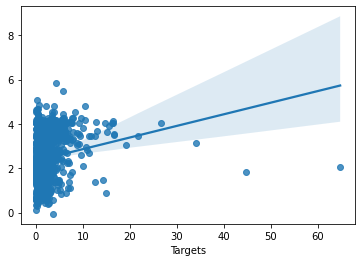

In [223]:
sns.regplot(y_test,predictions)